In [2]:
import numpy as np 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## linear regression

In [2]:
# In practice, it is simpler to minimize the Mean Square Error (MSE)
# than the RMSE, and it leads to the same result (because the value that minimizes a
# function also minimizes its square root).

In [3]:
# Mse cost function of a linear regression model :
#     MSE(X, hO) = 1/m * (O.T * X - y)^2
# yk..

In [4]:
# the normal equatoin :
# O = (X.T * X)^-1 * X.T * y
# yk..

In [5]:
# generating some linear data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X.shape, y.shape

((100, 1), (100, 1))

In [6]:
# Now let’s compute θ using the Normal Equation. We will use the inv() function from
# NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and
# the dot() method for matrix multiplication: 

X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_b.shape, theta_best.shape, theta_best

((100, 2),
 (2, 1),
 array([[4.35352005],
        [2.62723311]]))

In [7]:
# The actual function that we used to generate the data is y = 4 + 3x1 + Gaussian noise.
# Let’s see what the equation found:
theta_best
# We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close
# enough, but the noise made it impossible to recover the exact parameters of the original
# function.

array([[4.35352005],
       [2.62723311]])

In [8]:
# Now you can make predictions using θ:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict, X_new, X_new_b

(array([[4.35352005],
        [9.60798628]]),
 array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]))

In [9]:
# explanation... of all above here

# first we made X and y,, i.e. points. as u see below 
# as you know the equation for linear regression i.e. y=(theta0) + (theta1)x
# so we used normal equation to calculate theta.. ok fine till now
# then X_new are the points on which we wanna calculate the prediction .. i.e. on points 0 and 2
# so we just gotta multiply these with theta but,,,, we also gotta add 1 to the matrix/array so we can multiply it with theta0
# then new matrix X_new_b is same as X_new but just with extra 1 for theta0
# then we predict y_predict by multiplying these 2.
# and at end we just plot these..


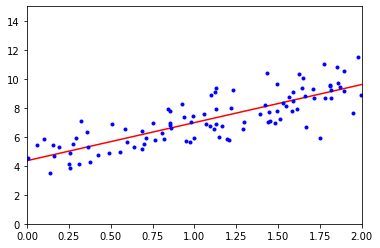

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## performing linear regression using scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.35352005]), array([[2.62723311]]))

In [12]:
# data for plotting line (prediction)
X_predict_1 = lin_reg.predict([[0]])
X_predict_2 = lin_reg.predict([[2]])
X_predict_1, X_predict_2

(array([[4.35352005]]), array([[9.60798628]]))

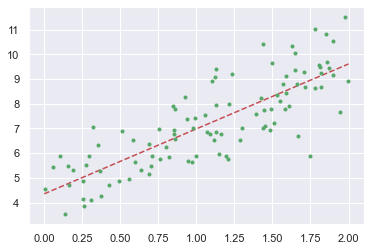

In [13]:
# better way to plot.. 
import seaborn as sns
sns.set_theme(style="darkgrid")
x_predict = np.linspace(0, 2, 20)
x_predict = x_predict.reshape(20,-1)
x_predicted = lin_reg.predict(x_predict)
plt.plot(x_predict, x_predicted,'r--')
plt.plot(X,y, '.g')

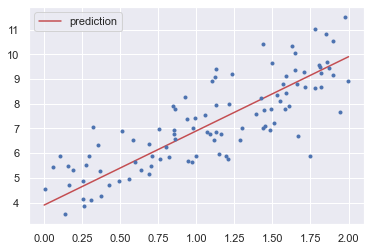

In [22]:
# this is the data
# this might not be the best way to do this,, but for now.. it's ok
plt.plot([0,2], [3.9, 9.9], "r-", label="prediction")
# we need 2 points to plot line.. so . 
plt.plot(X, y, "b.") 
plt.legend()

In [15]:
# The LinearRegression class is based on the scipy.linalg.lstsq() function (the
# name stands for “least squares”), which you could call directly:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.35352005],
        [2.62723311]]),
 array([106.70458777]),
 2,
 array([15.4140489 ,  3.59533444]))

In [16]:
# This function computes θ = X+y, where X+ is the pseudoinverse of X (specifically the
# Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse
# directly:
# >>> np.linalg.pinv(X_b).dot(y)
# array([[4.21509616],
# [2.77011339]])

# just read page->119

# The pseudoinverse itself is computed using a standard matrix factorization technique
# called Singular Value Decomposition (SVD)

# This approach is more efficient than computing the
# Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
# not work if the matrix XTX is not invertible (i.e., singular), such as if m < n or if some
# features are redundant, but the pseudoinverse is always defined.

# read pages-> upto 119

# Computational Complexity

In [17]:
# Warning :
# Both the Normal Equation and the Singular Value Decomposition (SVD) approach get very slow
# when the number of features grows large (e.g., 100,000). On the
# positive side, both are linear with regards to the number of instances
# in the training set (they are O(m)), so they handle large training
# sets efficiently, provided they can fit in memory.

# yk the normal equation's time.. as it computes the inverse of 
# X.T * X which is an (n + 1) X (n + 1) matrix

# different ways of training a linear regression model

# Gradient descent

In [18]:
# while using gradient descent, you should ensure that all features have
# a similar scale, or else it will take much longer to converge


# An important parameter in Gradient Descent is the size of the steps, determined by
# the learning rate hyperparameter.

In [19]:
# Linear Regression model happens to be a
# convex function, which means that if you pick any two points on the curve, the line
# segment joining them never crosses the curve. This implies that there are no local
# minima, just one global minimum.

## Batch gradient descent (full gradient descent)

In [23]:
# Notice that this formula involves calculations over the full training
# set X, at each Gradient Descent step! This is why the algorithm is
# called Batch Gradient Descent: it uses the whole batch of training
# data at every step (actually, Full Gradient Descent would probably
# be a better name). As a result it is terribly slow on very large training
# sets (but we will see much faster Gradient Descent algorithms
# shortly). However, Gradient Descent scales well with the number of
# features; training a Linear Regression model when there are hundreds
# of thousands of features is much faster using Gradient
# Descent than using the Normal Equation or SVD decomposition.

# page->124

In [24]:
# now yk
# theta = theta - (learning rate)(derivative)

In [25]:
# quick implementation
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)
print(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients
    
theta, X[:5], X_b[:5]

[[ 0.11284033]
 [-1.78197091]]


(array([[3.80386631],
        [3.08672482]]),
 array([[1.23277725],
        [0.60539337],
        [1.97514311],
        [0.76076579],
        [0.21079247]]),
 array([[1.        , 1.23277725],
        [1.        , 0.60539337],
        [1.        , 1.97514311],
        [1.        , 0.76076579],
        [1.        , 0.21079247]]))

In [26]:
# To find a good learning rate, you can use grid search (see Chapter 2). However, you
# may want to limit the number of iterations so that grid search can eliminate models
# that take too long to converge.

# You may wonder how to set the number of iterations. If it is too low, you will still be
# far away from the optimal solution when the algorithm stops, but if it is too high, you
# will waste time while the model parameters do not change anymore. A simple solution
# is to set a very large number of iterations but to interrupt the algorithm when the
# gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny
# number ϵ (called the tolerance)—because this happens when Gradient Descent has
# (almost) reached the minimum.

## stochastic gradient descent

In [27]:
# Stochastic Gradient Descent just
# picks a random instance in the training set at every step and computes the gradients
# based only on that single instance.

# this makes it faster but it keep on bouncing up and down
# so once the algorithm stops, the final parameter values are good, but no optimal

# page->126

In [28]:
# When the cost function is very irregular (as in Figure 4-6), this can actually help the
# algorithm jump out of local minima, so Stochastic Gradient Descent has a better
# chance of finding the global minimum than Batch Gradient Descent does.

# Therefore randomness is good to escape from local optima, but bad because it means
# that the algorithm can never settle at the minimum. One solution to this dilemma is
# to gradually reduce the learning rate. The steps start out large (which helps make
# quick progress and escape local minima), then get smaller and smaller, allowing the
# algorithm to settle at the global minimum. This process is akin to simulated annealing,
# an algorithm inspired from the process of annealing in metallurgy where molten
# metal is slowly cooled down. The function that determines the learning rate at each
# iteration is called the learning schedule. If the learning rate is reduced too quickly, you
# may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
# the learning rate is reduced too slowly, you may jump around the minimum for a
# long time and end up with a suboptimal solution if you halt training too early.

In [29]:
# implementation using simple learning shedule

n_epochs = 50
t0, t1 = 5, 50 # learning shedule hyperparameters
def learning_schedule(t):
    return t0/ (t1 + t)

theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # see we used only 1 x, rather then the whole training set..
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [30]:
# By convention we iterate by rounds of m iterations; each round is called an epoch.
# While the Batch Gradient Descent code iterated 1,000 times through the whole training
# set, this code goes through the training set only 50 times and reaches a fairly good
# solution:

In [31]:
# ig we should use SGD in case of multiple regression cause there may be 
# local min here, whereas in case of linear there is no local min..
# i think it is a good option to shuffle every time.. see page->128

In [32]:
# The following implements the linear regression using SGDregression class
# code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
# by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1
# (eta0=0.1), using the default learning schedule (different from the preceding one),
# and it does not use any regularization (penalty=None; more details on this shortly):

In [27]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

# penalty is regularization term i.e. l1 or l2 regularization
# tolerance is here for when the loss drops by less than 1e-3
# eta = starting learning rate
# there is also a shuffle parameter .. do check docs.

SGDRegressor(eta0=0.1, penalty=None)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.66975811]), array([1.26477379]))

## Mini-batch gradient descent

In [35]:
# It is quite simple to understand once you know Batch and Stochastic Gradient
# Descent: at each step, instead of computing the gradients based on the full training
# set (as in Batch GD) or based on just one instance (as in Stochastic GD), Minibatch
# GD computes the gradients on small random sets of instances called minibatches.
# The main advantage of Mini-batch GD over Stochastic GD is that you can
# get a performance boost from hardware optimization of matrix operations, especially
# when using GPUs.

In [36]:
# There is almost no difference after training: all these algorithms
# end up with very similar models and make predictions in exactly
# the same way.
# there is also a graph.. see page->129

# page->130 is good for difference between these..


## polynomial regresson 

In [37]:
# What if your data is actually more complex than a simple straight line? Surprisingly,
# you can actually use a linear model to fit nonlinear data. A simple way to do this is to
# add powers of each feature as new features, then train a linear model on this extended
# set of features. This technique is called Polynomial Regression.

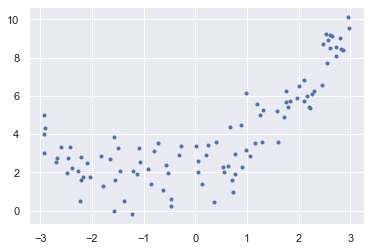

In [29]:
# generating some non-linear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
# do check out the difference between .rand and .randn
plt.plot(X, y, "b.")

In [31]:
# Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s Poly
# nomialFeatures class to transform our training data, adding the square (2nd-degree
# polynomial) of each feature in the training set as new features (in this case there is
# just one feature):

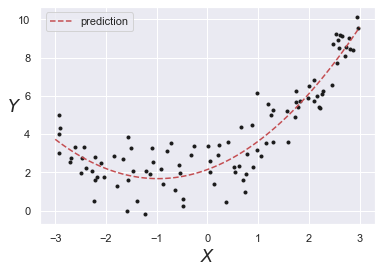

In [92]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
# for clearence of fit , transform..
X_poly = poly.fit(X)
x_poly = X_poly.transform(X)
x_poly[0]
lin_reg.fit(x_poly, y)
# what we did here
# we first created some points to test our model i.e., to get prediction
# but linspace give a thing like (100,) which is not a valid arry so we have to reshape it first.. so yk..
compatible_points = np.linspace(-3,3,100).reshape(x_axis.shape[0],-1) 
x_axis = poly.fit_transform(compatible_points)
predicted = lin_reg.predict(x_axis)
plt.plot(X,y,'k.')
plt.plot(compatible_points, predicted, 'r--', label = "prediction")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$Y$", rotation=0, fontsize=18)
plt.legend()

In [71]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0], X_poly[:4]

# Note that min_degree=0 and min_degree=1 are equivalent as outputting the degree zero term is determined by include_bias.
# taken from docs..

(array([-0.48128225]),
 array([-0.48128225,  0.2316326 ]),
 array([[-0.48128225,  0.2316326 ],
        [ 2.53058687,  6.4038699 ],
        [-1.49777485,  2.2433295 ],
        [-1.57676793,  2.48619711]]))

In [72]:
# X_poly now contains the original feature of X plus the square of this feature. Now you
# can fit a LinearRegression model to this extended training data
X_poly[:5], X[:5]

(array([[-0.48128225,  0.2316326 ],
        [ 2.53058687,  6.4038699 ],
        [-1.49777485,  2.2433295 ],
        [-1.57676793,  2.48619711],
        [ 2.5984991 ,  6.75219757]]),
 array([[-0.48128225],
        [ 2.53058687],
        [-1.49777485],
        [-1.57676793],
        [ 2.5984991 ]]))

In [73]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1479657]), array([[0.97737067, 0.5011593 ]]))

In [74]:
## data for plotting
lin_reg.predict([[-3, 9]]), lin_reg.predict([[3, 9]])
# we gotta pass x and x^2 to predict function
X_temp = [[-3, 9], [3, 9], [0, 0]]
y_temp = [2.1 + 1.01*x + 0.43*y for x, y in X_temp]
X_temp, y_temp

([[-3, 9], [3, 9], [0, 0]], [2.94, 9.0, 2.1])

In [76]:
# this linespace one is really important function.. ...zzzz
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # really important...........
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

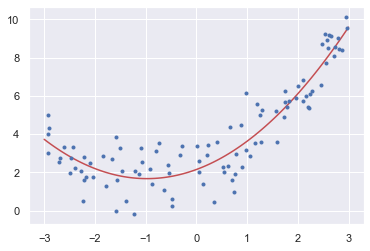

In [77]:
plt.plot(X_new, y_new, "r-")
# I am just taking only 3 points so the line looks like this.. i will improve .. the plot.. later..😅
plt.plot(X, y, "b.")

In [46]:
# plt.plot(X, y, "b.")
# z = lin_reg.coef_[0,0]*(X**2)+ lin_reg.coef_[0,1]*X + lin_reg.intercept_
# plt.plot(z)
# plt.plot(lin_reg.intercept_*X, lin_reg.coef_*y, "b.")

In [47]:
# Note that when there are multiple features, Polynomial Regression is capable of finding
# relationships between features (which is something a plain Linear Regression
# model cannot do). This is made possible by the fact that PolynomialFeatures also
# adds all combinations of features up to the given degree. For example, if there were
# two features a and b, PolynomialFeatures with degree=3 would not only add the
# features a2, a3, b2, and b3, but also the combinations ab, a2b, and ab2.

## learning curves

In [142]:
# function that plots the learning curves of a model given some training data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train = []
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14, rotation=0, loc="top")
    train.append(train_errors)

In [176]:
# mine

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
    train_errors, val_errors = [], []
    for m in range(1, len(X)):
        model.fit(X_train[:m], y_train[:m])
        pred_train = model.predict(X_train[:m])
        pred_val = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], pred_train))
        val_errors.append(mean_squared_error(y_val, pred_val))
    plt.plot(np.sqrt(train_errors), "b-", linewidth=2, label="train_error")
    plt.plot(np.sqrt(val_errors),  "y-", linewidth=2, label="val_error")
    plt.xlabel("traning_examples (m)")
    plt.ylabel("RSME", rotation=0)
    plt.legend()


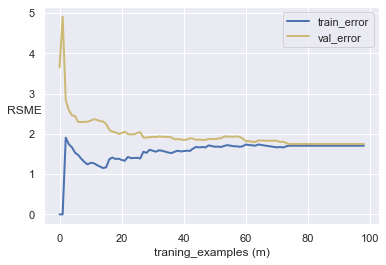

In [178]:
lin_reg = LinearRegression()
# lin_reg.fit(X, y)
# plot_learning_curves(lin_reg, X, y)
plot_curves(lin_reg, X, y)
# idk what happned see page->134

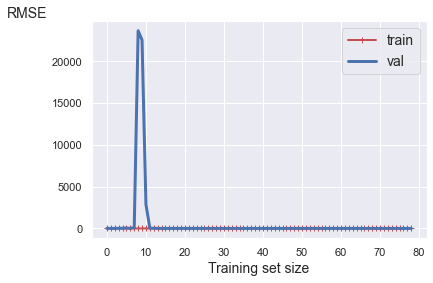

In [180]:
# if a model is underfitting the training data, adding more training 
# examples will not help so .. instead use a more complex model
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
# better see page->135

In [51]:
# one way to improve an overfitting model is to feed it more training
# data until the validation error reaches the training error

In [52]:
# the bias/variance tradeoff

# An important theoretical result of statistics and Machine Learning is the fact that a
# model’s generalization error can be expressed as the sum of three very different
# errors:

# Bias

# This part of the generalization error is due to wrong assumptions, such as assuming
# that the data is linear when it is actually quadratic. A high-bias model is most
# likely to underfit the training data.10

# Variance

# This part is due to the model’s excessive sensitivity to small variations in the
# training data. A model with many degrees of freedom (such as a high-degree polynomial
# model) is likely to have high variance, and thus to overfit the training
# data.

# Irreducible error

# This part is due to the noisiness of the data itself. The only way to reduce this
# part of the error is to clean up the data (e.g., fix the data sources, such as broken
# sensors, or detect and remove outliers).
# Increasing a model’s complexity will typically increase its variance and reduce its bias.
# Conversely, reducing a model’s complexity increases its bias and reduces its variance.
# This is why it is called a tradeoff.

## regularized linear model

In [53]:
# a good way to reduce overfitting is to regularize the model..
# We will now look at Ridge Regression, Lasso Regression, and Elastic Net,
# which implement three different ways to constrain the weights.

## ridge regression

In [54]:
# a simple diff in l1 and l2 regularization

# as yk we add a term like: lambda E (theta)...
# in l2 regularization we add lambda E (theta)^2 
# and in l1 regularization we add: lambda E |theta|


In [55]:
# a regularization term: (alpha)E(theta)^2 is added to cost function
# The hyperparameter α controls how much you want to regularize the model. If α = 0
# then Ridge Regression is just Linear Regression. If α is very large, then all weights end
# up very close to zero and the result is a flat line going through the data’s mean. Equation
# 4-8 presents the Ridge Regression cost function.

# j(theta) = MSE(theta) + (alpha)*1/2*E(theta)^2

# WARNING: 
#     It is important to scale the data (e.g., using a StandardScaler)
# before performing Ridge Regression, as it is sensitive to the scale of
# the input features. This is true of most regularized models.

In [56]:
# do check out page->138 shows graphs,, and differences

# As with Linear Regression, we can perform Ridge Regression either by computing a
# closed-form equation or by performing Gradient Descent. The pros and cons are the
# same. Equation 4-9 shows the closed-form solution (where A is the (n + 1) × (n + 1)
# identity matrix13 except with a 0 in the top-left cell, corresponding to the bias term).

In [57]:
# ridge regression closed_form
# Equation 4.9
# (theta) = (X.T * x + (alpha)A)^-1 * X.T * y

In [183]:
# Here is how to perform Ridge Regression with Scikit-Learn using a closed-form solution
# (a variant of Equation 4-9 (see above) using a matrix factorization technique by André-Louis
# Cholesky):

# do check equation, read page->138

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.36151826]])

In [184]:
# now using Stochastic Gradient Descent
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
# ravel flattens the array.. see docs
sgd_reg.predict([[1.5]])

# The penalty hyperparameter sets the type of regularization term to use. Specifying
# "l2" indicates that you want SGD to add a regularization term to the cost function
# equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge
# Regression.


array([5.3635237])

## Lasso Regression 

In [185]:
# just like Ridge
# Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm
# of the weight vector instead of half the square of the ℓ2 norm

# j(theta) = MSE(theta) + (alpha)E|theta|

# see page->140

# An important characteristic of Lasso Regression is that it tends to completely eliminate
# the weights of the least important features (i.e., set them to zero). For example,
# the dashed line in the right plot on Figure 4-18 (with α = 10-7) looks quadratic, almost
# linear: all the weights for the high-degree polynomial features are equal to zero. In
# other words, Lasso Regression automatically performs feature selection and outputs a
# sparse model (i.e., with few nonzero feature weights).

In [187]:
# The Lasso cost function is not differentiable at θi = 0 (for i = 1, 2, ⋯, n), but Gradient
# Descent still works fine if you use a subgradient vector g15 instead when any θi = 0.
# Equation 4-11 shows a subgradient vector equation you can use for Gradient Descent
# with the Lasso cost function.

# example using a lasso class
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([5.32571058])

## Elastic net

In [188]:
# The
# regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
# and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
# Regression, and when r = 1, it is equivalent to Lasso Regression

# the cost function is also a mix of 2 you can see page->142


In [191]:
# example

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

# or you can use 
model = SGDRegressor(l1_ratio=0.5, alpha=0.1)
model.fit(X,y.ravel())
model.predict([[1.5]]) , elastic_net.predict([[1.5]])


(array([5.30590934]), array([5.32557578]))

## early stopping

In [64]:
# A very different way to regularize iterative learning algorithms such as Gradient
# Descent is to stop training as soon as the validation error reaches a minimum. This is
# called early stopping.
# page->143

In [65]:
# # Here is a basic implementation of early stopping:
# from sklearn.base import clone
# from sklearn.preprocessing import StandardScaler
# # prepare the data
# poly_scaler = Pipeline([
# ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
# ("std_scaler", StandardScaler())
# ])
# X_train_poly_scaled = poly_scaler.fit_transform(X_train)
# X_val_poly_scaled = poly_scaler.transform(X_val)
# sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
# penalty=None, learning_rate="constant", eta0=0.0005)
# minimum_val_error = float("inf")
# best_epoch = None
# best_model = None
# for epoch in range(1000):
#     sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
#     y_val_predict = sgd_reg.predict(X_val_poly_scaled)
#     val_error = mean_squared_error(y_val, y_val_predict)
#     if val_error < minimum_val_error:
#         minimum_val_error = val_error
#         best_epoch = epoch
#         best_model = clone(sgd_reg)
        
# Note that with warm_start=True, when the fit() method is called, it just continues
# # training where it left off instead of restarting from scratch.

# Logistic regression

In [66]:
# page->144
# there is no Normal Equation for this..but the cost function is convex
# so gradient descent is guaranteed to find the global minimum

# Once you have the gradient vector containing all
# the partial derivatives you can use it in the Batch Gradient Descent algorithm. That’s
# it: you now know how to train a Logistic Regression model. For Stochastic GD you
# would of course just take one instance at a time, and for Mini-batch GD you would
# use a mini-batch at a time.


## Decision boundaries

In [52]:
# Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal
# width feature.

from sklearn import datasets
iris = datasets.load_iris()

X = iris["data"][:, 3:] # petal width
y = (iris["target"]==2).astype(int) # 1 if Iris-Virginica(or simply say virginica), else 0

# changing data from pandas load_iris() to seaborn one.. look at this mam.. amazing..
# used map and all

list(iris.keys()), iris["target_names"]
df = pd.DataFrame(iris["data"] , columns=iris["feature_names"])
df["species"] = iris["target"]
df["species"] = df["species"].map({0:"setosa", 1:"versicolor", 2:"virginica"})
df
X.shape, y.shape


((150, 1), (150,))

In [35]:
# mine implementation
# making a classifier on basis of petal width,.
import seaborn as sns
df = sns.load_dataset("iris")
mine_x = df["petal_width"]
mine_x = mine_x.to_numpy(dtype=float)
mine_x = mine_x.reshape(mine_x.shape[0], -1)

mine_yy = df["species"][df["species"]=="virginica"]

mine_y = np.where(df["species"]=="virginica", 1, 0)

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# mine_x = scaler.fit_transform(mine_x)
model = LogisticRegression()
model.fit(mine_x, mine_y)
mine_x.shape, mine_y.shape

((150, 1), (150,))

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       [9.99220183e-01, 7.79816732e-04],
       [9.99209978e-01, 7.90022153e-04]])

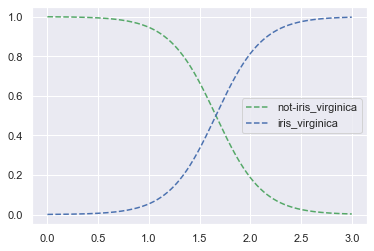

In [38]:
sns.set_theme(style="darkgrid")
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
predictions = model.predict_proba(X_new)
# predictions.shape
plt.plot(X_new, predictions[:,0], "g--", label="not-iris_virginica")
plt.plot(X_new, predictions[:,1], "b--", label="iris_virginica")
plt.legend()
predictions[:5]

In [39]:
X.shape, y.shape
# iris.target_names
iris["data"][:3], X[:3]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2]]),
 array([[0.2],
        [0.2],
        [0.2]]))

In [40]:
# train
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04]])

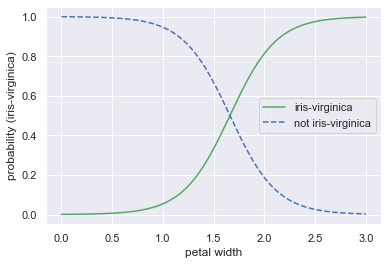

In [41]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # -1 indicates unknown dimension
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="iris-virginica") # cause it return 2 columns of prob.. one for 0 and one for 1
plt.plot(X_new, y_proba[:, 0], "b--", label="not iris-virginica")
plt.legend()
plt.xlabel("petal width")
plt.ylabel("probability (iris-virginica)", rotation ="vertical")
y_proba[:3]

In [42]:
X_new.shape

(1000, 1)

In [44]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [49]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
wow = np.c_[x0.ravel(), x1.ravel()]
wow

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

In [98]:
# Logistic regression models can be regularized using l1 and l2 penalties.
# Scikit-learn actually adds l2 penalty by default

## softmax regression

In [268]:
# The Logistic Regression model can be generalized to support multiple classes directly,
# without having to train and combine multiple binary classifiers.
# This is called Softmax Regression, or Multinomial Logistic Regression.

# The idea is quite simple: when given an instance x, the Softmax Regression model
# first computes a score sk(x) for each class k, then estimates the probability of each
# class by applying the softmax function (also called the normalized exponential) to the
# scores. The equation to compute sk(x) should look familiar, as it is just like the equation
# for Linear Regression prediction

# s.. = X.T * (theta)^(k)

In [272]:
# explanation of code below..

# objective: Train a classifier to detect iris-virginica species from other based on petal length and width

# flow:
# define traning set.. X and y
# train a model using suitable values for hyperparameters
# choose points to predict probabilities on. (which will help us plot contour)
#     we do this by using a combination of meshgrid and linspace
#     X_new is a array with 2 columns one for petal length and other for petal width (which will be used in prediction)
# y_proba : predicted probabilities on X_new
# plot.. green rectangles, blue squares for iris-virginica and other species. (which you like)
# then we plot contour. we did it for y_proba[:, 1] (you can also do for 0 both are same only difference is the position of black and orange lines)
# we calculated the main decesion line 
#     left_right : 2 points on x_axis.
#     boundary : it is correct formula to calculate y given theta0, theta1, bias term.
#     try yourself : for eg. on line 3y+2x-6=0. you will get the same formula (HINT: solve for y)
# plot decision line
# then plot additional things...

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

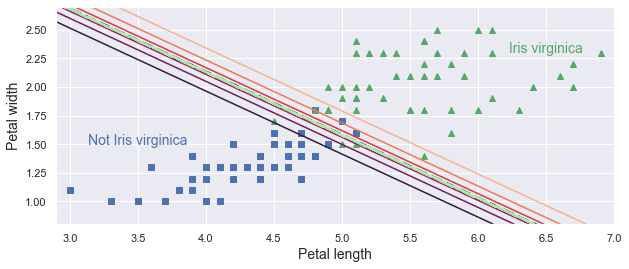

In [303]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int) # 1 for virginica else 0

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
plt.contour(x0, x1, zz)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
# plt.show()
# zz
# plt.plot(X[y==1,0],X[y==1,1], "bs")
zz.shape, y_proba.shape

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
zz = log_reg.predict(X_new)
plt.contour(x0, x1, zz.reshape(x0.shape), cmap=custom_cmap)



Text(0, 0.5, 'Petal width')

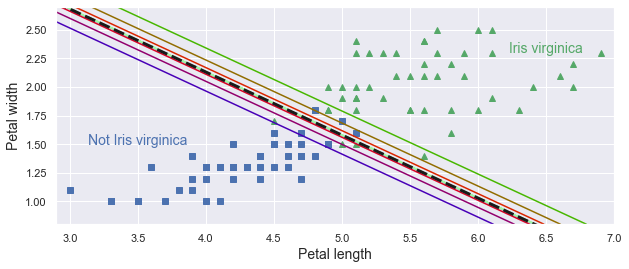

In [311]:
# mine

# from sklearn.linear_model import LogisticRegressionCV
df = sns.load_dataset("iris")
# we will make a classifier based on petal width and petal length

# making of X
X_mine = df[["petal_length","petal_width"]]
X_mine = X_mine.to_numpy()
y_mine = np.where(df["species"]=="virginica", 1, 0)

# plotting samples i.e all green and square ones
plt.figure(figsize=(10, 4))
plt.plot(X_mine[y_mine==1,0],X_mine[y_mine==1,1], "g^")
plt.plot(X_mine[y_mine==0,0],X_mine[y_mine==0,1], "bs")

model = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
model.fit(X_mine, y_mine)

# these are point which we wanna predict on
x0, x1 = np.meshgrid(np.linspace(2.9,7,500),
                    np.linspace(0.8,2.7,200))
coordinates = np.c_[x0.ravel(), x1.ravel()] # on which we will predict probabilities
predictions = model.predict_proba(coordinates)

# this is just another line for plotting a line like the black dotted line
# like you used contour with predict_proba to draw those colourful lines
# and if you used predict method insted you can draw the real decesion boundary instead
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
zz = log_reg.predict(coordinates)
plt.contour(x0, x1, zz.reshape(x0.shape), cmap=custom_cmap)

# these are the colourful lines except the black dotted line
plt.contour(x0, x1, predictions[:,1].reshape(x0.shape), cmap=plt.cm.brg)
plt.axis([2.9, 7, 0.8, 2.7])
plt.clabel(contour, inline=1, fontsize=12)

# these points are for plotting the black dotted line
left_right = np.array([2.9,7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

# some additional changes to plot
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)

In [74]:
# page->149 to 152

# The Softmax Regression classifier predicts only one class at a time
# (i.e., it is multiclass, not multioutput) so it should be used only with
# mutually exclusive classes such as different types of plants. You
# cannot use it to recognize multiple people in one picture.

In [339]:
# Let’s use Softmax Regression to classify the iris flowers into all three classes.
# Scikit-
# Learn’s LogisticRegression uses one-versus-all by default when you train it on more
# than two classes, but you can set the multi_class hyperparameter to "multinomial"
# to switch it to Softmax Regression instead. You must also specify a solver that supports
# Softmax Regression, such as the "lbfgs" solver (see Scikit-Learn’s documentation
# for more details). It also applies ℓ2 regularization by default, which you can
# control using the hyperparameter C.


X = iris["data"][:, (2, 3)] # Petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)


LogisticRegression(C=10, multi_class='multinomial')

In [340]:
print(softmax_reg.predict([[5, 2]]))
softmax_reg.predict_proba([[5, 2]])

[2]


array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

((100000,), (100000, 3))

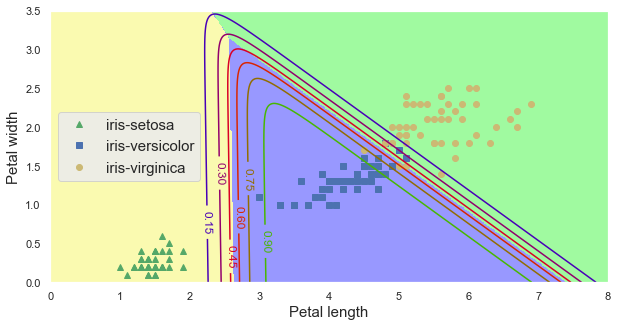

In [401]:
# mine
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
# x0.shape, x0.ravel().shape

# traning model on all species for petal length and petal width 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
model.fit(X, y)

# predictions
y_proba = model.predict_proba(X_new)
y_predict = model.predict(X_new)

# plotting
plt.figure(figsize=(10,5))
plt.plot(X[y==0,0], X[y==0,1],"g^", label="iris-setosa")
plt.plot(X[y==1,0], X[y==1,1],"bs", label="iris-versicolor")
plt.plot(X[y==2,0], X[y==2,1],"yo", label="iris-virginica")
plt.legend(loc='center left', fontsize=15)

# plotting decision boundary (using y_predict)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, y_predict.reshape(x0.shape), cmap=custom_cmap)

contour = plt.contour(x0, x1, y_proba[:,1].reshape(x0.shape),cmap=plt.cm.brg) # NOTE: try different values.. y_proba[:,1] ; y_proba[:,2] see difference.
plt.clabel(contour) # this helps in showing values(numbers) in between line i.e., see 0.15, 0.30 etc.. on contour lines

# plt.contour(x0, x1, y_proba[:,2].reshape(x0.shape)) 
# plt.text(1, 1.5, "iris-setosa", color="blue", fontsize=20, ha="center")
# plt.text(4.5, 0.5, "iris-versicolor", color='g', fontsize=20, ha="center" )

# some additional touchup
plt.xlabel("Petal length", fontsize=15)
plt.ylabel("Petal width", fontsize=15)

# df = pd.DataFrame(y)
# df.value_counts()
y_predict.shape, y_proba.shape

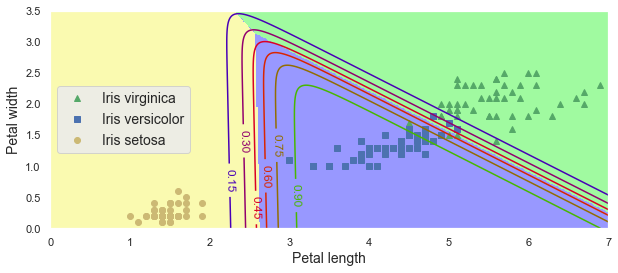

In [384]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
# save_fig("softmax_regression_contour_plot")
plt.show()